# Crowd Funding Data Analysis for Kickstarter

## 1. Project Overview : Crowd Funding Data Analysis for Kickstarter

### CrowdFunding

Crowdfunding is a concept of collecting funds from people , on a public platform for a particular cause. The cause can be initated as a campaign or a project which is launched globally, for instance on a website. This website can be made accessible to the contributers who wish to pledge any amount for a cause from anywhere across the world. The pledged amount could be contributions made for social causes or funds for startups.

### Kickstarter

Kickstarter is a one of the crowdfunding websites that is focused on encouraging creativity. It hosts projects across a wide range of categories thereby providing a public platform for the campaign or project owners to intiate their cause.

Access website here : https://www.kickstarter.com/

### Goal

In this project we would like to analyze the success rate of a campaign hosted on kicstarter. Some of the questions that we would like to address are :

1. What are the factors contributing towards the success or failure of a project?
2. For a campaign owner to launch a project, what parameters should be considered in order for it to be a success ?

### Audience

We are aiming for this analysis will be useful to people who are interested in raising funds for their cause, so that they can decide the amount that should be set as their goal and the timeline within which this goal can be achieved, in order to have a successful campaign.

### Source of data

This analysis is based on datasets that is obtained by webscrapping services provided by WebRobots.

1. Using the WebRobots tools, information is extracted from the Kickstarter website.
2. There were 56 files from years 2009 to 2019.
3. All of the 56 files were merged into a single file and some unwanted columns dropped before cleaning the data further.

## 2. Scope of Analysis :

### Understanding Data :

Below is a preview of Kickstarter. To give a brief on the features we are focusing on :

1. The 'State' column which defines the status of the Project hosted on kickstarter for which funds are being raised. The     'Project Status' can be one of the following : Successful, Failed, Suspended and Cancelled. 

2. Every project that is hosted on the Kickstarter website has the a target 'Goal' Amount (USD scaled to thousands) and a 'Timeline' (number of days to achieve the target goal). 

3. The contributors are the 'backers' which who pledge amounts that they wish to , in order to support the campaign. In other words, the 'Pledged' Amount is the amount of donations made. 

4. Contributors can pledge amounts until the deadline date. 

### Objective :

Our analysis aims at building a classification model to predict the success or failure of a new project with a given goal and timeline. Further, we attempt to predict ranges that goal and timelines can be modified to prevent a project from failing.

## 3. Data Cleaning and Merging

#### Importing important python libraries to carry out this analysis

In [1]:
# installations
#tree isualization 
#pip install graphviz
#pip install pydotplus

#gradient boosting
#pip install xgboost

In [2]:
#import all important libraries

#Data cleaning 
import glob
import pandas as pd
import pandas_profiling
import numpy as np
import datetime as dt
import ast 
import re
import math 
import os
import jupyter_contrib_nbextensions

#ignore warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

#Exploratory Data Analysis 
from scipy import stats
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning

#Hypothesis testing
from scipy.stats import ttest_ind

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Cross Validation
from sklearn import model_selection

#Linear Regression
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

#Decision Trees
from sklearn.tree import DecisionTreeRegressor
#from sklearn.cross_validation import cross_val_score, crossvalidation
from sklearn.model_selection import cross_val_score, ShuffleSplit
#from sklearn.model_selection import crossvalidation

#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#### 3.1 Reading multiple files into one

In [7]:
#Reading multiple files
path = r'C:\Users\Radhika\Anaconda3\Data Science Project\Dataset\Files' # use your path
all_files = glob.glob(path + "/*.csv")

files = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    files.append(df)

frame = pd.concat(files, axis=0, ignore_index=True)

#Preview Data
frame.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,103,"Funding the mixing, mastering, and promotion o...","{""id"":39,""name"":""Hip-Hop"",""slug"":""music/hip-ho...",5612,US,1456593666,"{""id"":1531055178,""name"":""JC Stroebel and Henry...",USD,$,True,...,john-chuck-and-the-class-debut-ep,https://www.kickstarter.com/discover/categorie...,True,True,successful,1459964983,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",5612.0,domestic
1,318,We follow the challenges and achievements of g...,"{""id"":30,""name"":""Documentary"",""slug"":""film & v...",26237,US,1495058182,"{""id"":652875854,""name"":""Matthew Temple"",""is_re...",USD,$,True,...,girls-of-summer-big-diamond-dreams,https://www.kickstarter.com/discover/categorie...,True,True,successful,1499054401,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",26237.0,domestic
2,0,Task No.1 is inspired by the history and expre...,"{""id"":38,""name"":""Electronic Music"",""slug"":""mus...",0,GB,1357630802,"{""id"":1699678150,""name"":""Sonny Phillips"",""slug...",GBP,£,False,...,task-no1,https://www.kickstarter.com/discover/categorie...,False,False,failed,1362937678,1.614583,"{""web"":{""project"":""https://www.kickstarter.com...",0.0,international
3,22,MAJOR KEY ALERT - Future Heroes is a Denver ra...,"{""id"":39,""name"":""Hip-Hop"",""slug"":""music/hip-ho...",1575,US,1455591114,"{""id"":518056209,""name"":""Future Heroes"",""is_reg...",USD,$,True,...,future-heroes-sxsw-is-calling,https://www.kickstarter.com/discover/categorie...,True,False,successful,1457935201,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1575.0,domestic
4,17,We're traveling to Rhode Island to film Mako a...,"{""id"":30,""name"":""Documentary"",""slug"":""film & v...",3290,US,1465224753,"{""id"":632937188,""name"":""Ryan Walton"",""is_regis...",USD,$,True,...,pelagic-shark-diving-shoot,https://www.kickstarter.com/discover/categorie...,True,False,successful,1467825676,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",3290.0,domestic


#### Selecting features from Webscrapped data

In [8]:
#webscraped
df_kickstarter = frame[["state","id","created_at","launched_at","deadline","category","country","currency","current_currency","fx_rate","static_usd_rate","goal","usd_pledged","location","backers_count","urls"]]
df_kickstarter.head()

,state,id,created_at,launched_at,deadline,category,country,currency,current_currency,fx_rate,static_usd_rate,goal,usd_pledged,location,backers_count,urls
0,successful,1023090679,1456593666,1457376583,1459964983,"{""id"":39,""name"":""Hip-Hop"",""slug"":""music/hip-ho...",US,USD,USD,1.000000,1.000000,5000.0,5612.0,"{""id"":2452078,""name"":""Minneapolis"",""slug"":""min...",103,"{""web"":{""project"":""https://www.kickstarter.com..."
1,successful,1225553537,1495058182,1496759560,1499054400,"{""id"":30,""name"":""Documentary"",""slug"":""film & v...",US,USD,USD,1.000000,1.000000,24042.0,26237.0,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",318,"{""web"":{""project"":""https://www.kickstarter.com..."
2,failed,688464571,1357630802,1357753678,1362937678,"{""id"":38,""name"":""Electronic Music"",""slug"":""mus...",GB,GBP,USD,1.205592,1.614583,4000.0,0.0,"{""id"":26734,""name"":""Liverpool"",""slug"":""liverpo...",0,"{""web"":{""project"":""https://www.kickstarter.com..."
3,successful,1502047884,1455591114,1456250581,1457935200,"{""id"":39,""name"":""Hip-Hop"",""slug"":""music/hip-ho...",US,USD,USD,1.000000,1.000000,500.0,1575.0,"{""id"":2391279,""name"":""Denver"",""slug"":""denver-c...",22,"{""web"":{""project"":""https://www.kickstarter.com..."
4,successful,1096433232,1465224753,1465233675,1467825675,"{""id"":30,""name"":""Documentary"",""slug"":""film & v...",US,USD,USD,1.000000,1.000000,2500.0,3290.0,"{""id"":2457078,""name"":""Narragansett"",""slug"":""na...",17,"{""web"":{""project"":""https://www.kickstarter.com..."


#### 3.2 Data types and conversions

In [9]:
print(df_kickstarter.dtypes)

#factor conversions
df_kickstarter['id'] = df_kickstarter['id'].astype(object)

state                object
id                    int64
created_at            int64
launched_at           int64
deadline              int64
category             object
country              object
currency             object
current_currency     object
fx_rate             float64
static_usd_rate     float64
goal                float64
usd_pledged         float64
location             object
backers_count         int64
urls                 object
dtype: object


##### 3.2.1 Date conversions

In [10]:
#date conversions
df_kickstarter["created_at"] = pd.to_datetime(df_kickstarter["created_at"],unit='s')
df_kickstarter["created_at"]= df_kickstarter["created_at"].dt.date

df_kickstarter["launched_at"] = pd.to_datetime(df_kickstarter["launched_at"],unit='s')
df_kickstarter["launched_at"]= df_kickstarter["launched_at"].dt.date

df_kickstarter["deadline"] = pd.to_datetime(df_kickstarter["deadline"],unit='s')
df_kickstarter["deadline"]= df_kickstarter["deadline"].dt.date

#Splitting Created_at date into year and month 
df_kickstarter[['lauchedat_year','lauchedat_month']] = df_kickstarter.launched_at.apply(lambda x : pd.Series(x.strftime("%Y,%m").split(",")))
df_kickstarter[['deadline_year','deadline_month']] = df_kickstarter.deadline.apply(lambda x : pd.Series(x.strftime("%Y,%m").split(",")))

df_kickstarter["launched_at"] = pd.to_datetime(df_kickstarter["launched_at"])
df_kickstarter["deadline"] = pd.to_datetime(df_kickstarter["deadline"])
df_kickstarter["created_at"] = pd.to_datetime(df_kickstarter["created_at"])

df_kickstarter['month_deadline'] = pd.to_datetime(df_kickstarter['deadline'], format='%m').dt.month_name().str.slice(stop=3)
df_kickstarter['month_launched'] = pd.to_datetime(df_kickstarter['launched_at'], format='%m').dt.month_name().str.slice(stop=3)

##### 3.2.2 Extract category

In [11]:
# looping all records and extracting category
array_cat = df_kickstarter["category"].values
rows = len(array_cat)
i=0
#array_cat_names=[]
category=[]
sub_category=[]
print(rows)
print(i)


while i <=(rows-1):
    str_temp = array_cat[i]
    tuple_temp = ast.literal_eval(str_temp)
    dict_temp = dict(tuple_temp)
 #   print(dict_temp["name"])
 #   array_cat_names.append(dict_temp["name"])
    if('/' in dict_temp['slug']):
        cat = dict_temp["slug"].split('/',2)
        category.append(cat[0])
        sub_category.append(cat[1])
    else :
        category.append(dict_temp['slug'])
        sub_category.append(dict_temp['slug'])
    i=i+1
#    print(i)

#drop old category
df_kickstarter = df_kickstarter.drop(columns="category")

#insert new category
df_kickstarter.insert(4,"category",category)
df_kickstarter.insert(5,"sub_category",sub_category)

52397
0


##### 3.2.3 Extract Location

In [12]:
# looping all records and extracting location
array_loc = df_kickstarter["location"].values
rows = len(array_loc)
i=0
array_loc_names=[]
print(rows)
print(i)


while i <=(rows-1):
    if( pd.isnull(array_loc[i]) ):
        array_loc_names.append('NA')
        i=i+1
    else:
        loc=re.search('"name":"(.*)","slug"',array_loc[i])
        array_loc_names.append(loc.group(1))
        i=i+1
        
len(array_loc_names)  

#drop old location
df_kickstarter = df_kickstarter.drop(columns="location")

#insert new location
df_kickstarter.insert(6,"city",array_loc_names) 

52397
0


##### 3.2.4 Calculating Timeline

In [13]:
#calculating number of days
no_days=df_kickstarter['deadline']-df_kickstarter['launched_at']

#inserting timeline
df_kickstarter.insert(4,"timeline",no_days.dt.days) 

##### 3.2.5 Currency Conversion

In [14]:
#currency conversion
usd_goal = df_kickstarter['goal'] * df_kickstarter['static_usd_rate']
df_kickstarter.insert(13,"usd_goal",usd_goal) 

# Scale the pledged amount and goal for interpretable plots and stats

df_kickstarter['usd_pledged'] = df_kickstarter['usd_pledged']/1000
df_kickstarter['usd_goal'] =  df_kickstarter['usd_goal'] / 1000

##### 3.2.6 Extracting URL for case study

In [15]:
#extract URL
print(df_kickstarter["urls"].head())

# looping all records and extracting urls
array_url = df_kickstarter["urls"].values
rows = len(array_url)
i=0
#array_cat_names=[]
web_url=[]
rewards_url=[]
print(rows)
print(i)


while i <=(rows-1):
    str_temp = array_url[i]
    tuple_temp = ast.literal_eval(str_temp)
    dict_temp = dict(tuple_temp)
 #   print(dict_temp["name"])
 #   array_cat_names.append(dict_temp["name"])
    web_url.append(dict_temp['web']['project'])
    rewards_url.append(dict_temp['web']['rewards'])
    i=i+1
#    print(i)

print(len(web_url))
print(len(rewards_url))

#insert the URLS
df_kickstarter.insert(14,"web_url",web_url) 
df_kickstarter.insert(15,"rewards_url",rewards_url) 

df_kickstarter = df_kickstarter.drop(columns="urls")

0    {"web":{"project":"https://www.kickstarter.com...
1    {"web":{"project":"https://www.kickstarter.com...
2    {"web":{"project":"https://www.kickstarter.com...
3    {"web":{"project":"https://www.kickstarter.com...
4    {"web":{"project":"https://www.kickstarter.com...
Name: urls, dtype: object
52397
0
52397
52397


### 3.3 Preview of Cleaned Data and Saving Merged file

In [16]:
# Preview cleaned data and save into a file
df_kickstarter.head()

,state,id,created_at,launched_at,timeline,category,sub_category,city,deadline,country,...,static_usd_rate,goal,usd_pledged,backers_count,lauchedat_year,lauchedat_month,deadline_year,deadline_month,month_deadline,month_launched
0,successful,1023090679,2016-02-27,2016-03-07,30,music,hip-hop,Minneapolis,2016-04-06,US,...,1.000000,5000.0,5.612,103,2016,03,2016,04,Apr,Mar
1,successful,1225553537,2017-05-17,2017-06-06,27,film & video,documentary,Los Angeles,2017-07-03,US,...,1.000000,24042.0,26.237,318,2017,06,2017,07,Jul,Jun
2,failed,688464571,2013-01-08,2013-01-09,60,music,electronic music,Liverpool,2013-03-10,GB,...,1.614583,4000.0,0.000,0,2013,01,2013,03,Mar,Jan
3,successful,1502047884,2016-02-16,2016-02-23,20,music,hip-hop,Denver,2016-03-14,US,...,1.000000,500.0,1.575,22,2016,02,2016,03,Mar,Feb
4,successful,1096433232,2016-06-06,2016-06-06,30,film & video,documentary,Narragansett,2016-07-06,US,...,1.000000,2500.0,3.290,17,2016,06,2016,07,Jul,Jun


In [ ]:
#Saving the file for reference
#df_kickstarter.to_csv('C:\\Users\\Radhika\\Anaconda3\\Data Science Project\\Dataset\\cleaned\\Files'+'CleanedData.csv')

## 4. Exploratory Data Analysis

After cleaning the data i.e, extracting the features from webscrapped data, converting date and numeric columns to appropriate formats, the file is merged to excel and is now ready for exploratory data analysis.

1. Trends of Project Status in the time frame of 9 years
2. Proportions of Successful and Failed projects per category and geographical location
3. Scatterplots to understand relationships between features

In [7]:
# Reading the merged file

# set path
path= r"C:\Users\akhur\Desktop\IDS Project\Cleaned"
cwd=os.chdir(path)

# read the file
df_merge = pd.read_csv("MergedDataNov.csv",index_col=0)

# check rows and colums
print("Number of observations and feautres in dataset : ")
print(df_merge.shape)

Number of observations and feautres in dataset : 
(207621, 26)


In [11]:
#Removing Duplicates
# Sort by Project ID
df_merge.sort_values('id',inplace=True)

# Drop the duplicateds
df_merge.drop_duplicates(subset='id',keep='first', inplace=True)

#Check the final count
print("Dimensions after removing duplicates")
print(df_merge.shape)
df_merge[['state','category','country','launched_at','timeline','usd_goal','usd_pledged','backers_count']].head()

Dimensions after removing duplicates
(182634, 26)


,state,category,country,launched_at,timeline,usd_goal,usd_pledged,backers_count
164816,successful,art,GB,2015-04-07,29,0.223731,0.258036,11
129747,failed,food,US,2015-10-27,30,20.000000,0.776000,18
55770,failed,fashion,CA,2015-06-15,45,14.614375,2.271723,42
72719,failed,food,US,2018-08-22,60,2.500000,0.096000,3
3826,successful,food,US,2016-05-16,45,2.500000,3.239000,68


Note : After removing duplicates the dataset contains total of 182634 rows and 26 columns. Duplciates are removed after data cleaning so that raw data can be carefully reviewed in its interpretable format before unknowingly deleting records.

## 4.1. Project status trendlines

There are 5 states of projects on Kickstarter. They are,
1. Successful
2. Failed
3. Suspended
4. Live
5. Cancelled
 
The trendlines of these projects are observed below.

In [13]:
df_merge['state'].unique()

array(['successful', 'failed', 'live', 'canceled', 'suspended'],
      dtype=object)

#### 4.1.1 Trendlines : Creating Pivot table

In [10]:
#pivot
trend_state = pd.DataFrame({'count' : df_merge.groupby( ['lauchedat_year','lauchedat_month','launched_at','state'] )['id'].size()}).reset_index()
trend_state=trend_state.pivot_table(trend_state, index=('lauchedat_year','lauchedat_month','launched_at'), columns='state')
trend_state.columns=trend_state.columns.droplevel(0)
trend_state.columns.name=None
trend_state=trend_state.reset_index()
trend_state.head()

#Replacing NaN with 0
trend_state=trend_state.fillna(0)
#trend_state.head()

#Converting to monthly time series
trends = trend_state[['launched_at','canceled','failed','live','successful','suspended']]
trends['launched_at']=pd.to_datetime(trends['launched_at'])
trends=trends.resample('M',on='launched_at').sum()
trends.head()

,canceled,failed,live,successful,suspended
launched_at,,,,,
2009-04-30,0.0,1.0,0.0,3.0,0.0
2009-05-31,0.0,3.0,0.0,9.0,0.0
2009-06-30,0.0,0.0,0.0,5.0,0.0
2009-07-31,0.0,1.0,0.0,9.0,0.0
2009-08-31,2.0,3.0,0.0,11.0,0.0


In [24]:
trends.tail()

,canceled,failed,live,successful,suspended
launched_at,,,,,
2019-04-30,75.0,691.0,0.0,1668.0,4.0
2019-05-31,89.0,885.0,0.0,1757.0,5.0
2019-06-30,68.0,604.0,240.0,1548.0,5.0
2019-07-31,50.0,249.0,1793.0,806.0,3.0
2019-08-31,14.0,2.0,1552.0,11.0,3.0


#### 4.1.2 Trendlines : Project Status

Text(0.5, 0, 'Years')

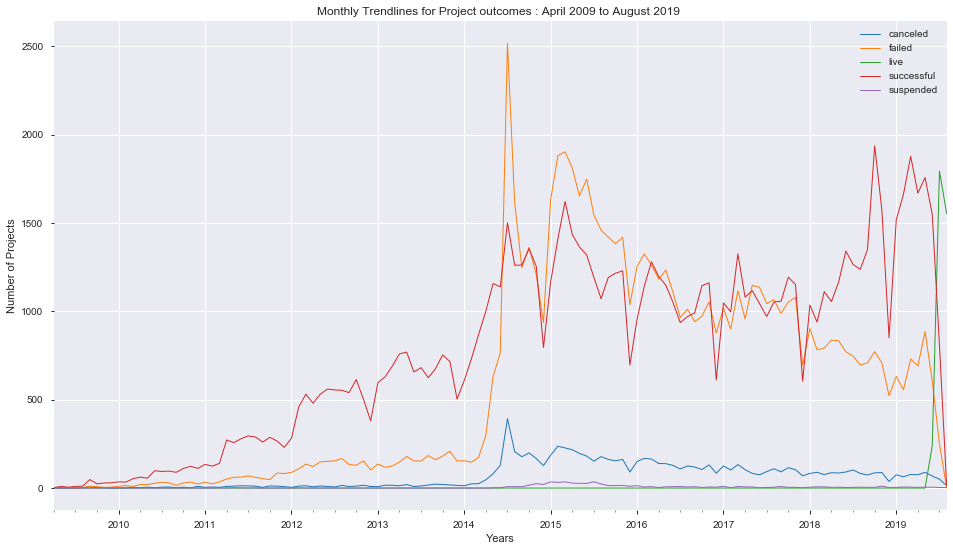

In [25]:
#trendlines
ax=trends[['canceled','failed','live','successful','suspended']].plot(linewidth=1,figsize=(16,9),title='Monthly Trendlines for Project outcomes : April 2009 to August 2019 ')
ax.set_ylabel('Number of Projects')
ax.set_xlabel('Years')

#### Trend Analysis : Project Status : Change in patterns

The above trend lines represent the monthly volume of projects hosted on kickstarter from April 2009 to August 2019.

1. From years 2010 to 2014 the projects hosted on Kicstarter were increaseing owing to its popularity has a crowdfunding platform. The number of failed an successful projects were both on the rise, although the successfull projects were significantly higher than the failed ones.

2. In the year 2014, the failure of projects was noticibly higher. 

3. The failure trends of projects continued to dominate over the successful trends uptil 2016.

4. From 2016 to end of 2017 , two years, rate of failure and success of projects were similar. 

5. Since 2018, the past year, there is an improvement in the chances of projects turning to be successful being higher and the failure trends dropping. 

6. We also observe a seasonal dip in the success of projects every year towards the end. We will analyze the seasonality patterns in further detail during timeseries analysis. 


#### 4.1.3  Proportions of Projects based on Status
Percentage of projects that are successful, failed,live and suspended are calculated to understand the data better.

In [26]:
# % calculations
counts = df_merge[['id','state']].groupby(['state']).count()
percentage_count =( counts / df_merge['id'].count())*100
percentage_count

,id
state,
canceled,4.630025
failed,40.076875
live,1.962942
successful,52.984110
suspended,0.346047


Note :
1. 52% of the Projects are successful.
2. 40% of the Projects have failed

## 4.2. Project Proportions : State and Category wise

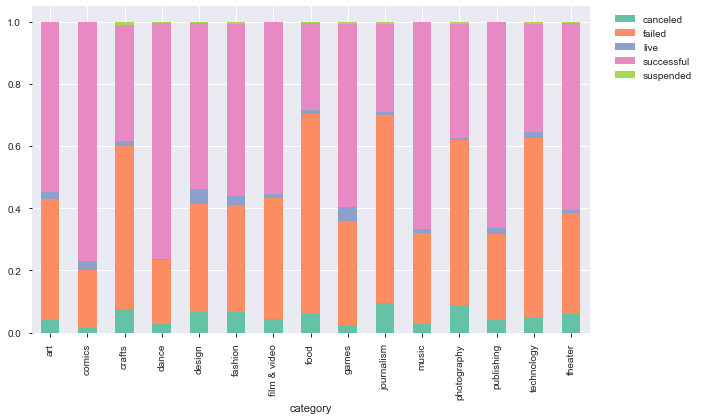

In [46]:
#creating stacked barplot
df_pct = (df_merge.groupby(['category','state'])['id'].count()/df_merge.groupby(['category'])['id'].count())
# plot the stacked plot
pal = sns.color_palette("Set2")
df_pct.unstack().plot.bar(stacked=True,figsize=(10,6),colors=pal)

plt.legend(loc='upper right', bbox_to_anchor=(1.2,1.))



### Inference of Categorical Classification

1. The proportions of successful projects are higher for categories like 'Dance', 'Comics', 'Music' and 'Publishing'
2. The proportions of failed projects are higher for categories like 'food' , 'journalism' and 'techonology'

As a result , we might want to infer that Kickstarter is a good platform for Dancers, Comic writers and Musicians to raise funds for their talent. Unfortunately the projects for Food or Technology are not very popluar among the crowd.

### 4.2.1 Project Proportions : State and Location wise

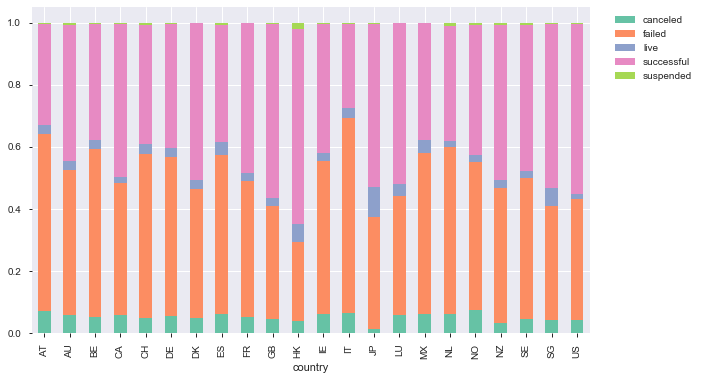

In [47]:
#creating stacked barplot
df_pct = (df_merge.groupby(['country','state'])['id'].count()/df_merge.groupby(['country'])['id'].count())
# plot the stacked plot
pal = sns.color_palette("Set2")
df_pct.unstack().plot.bar(stacked=True,figsize=(10,6),colors=pal)

plt.legend(loc='upper right', bbox_to_anchor=(1.2,1.))


### Inference of Country-wise Classification

1. The proportions of successful projects are higher for categories like 'Hong Kong', 'Great Britain', 'United States
2. The proportions of failed projects are higher for categories like 'Italy', 'Austria','Belgium', 'China'

As a result , we might want to infer that Kickstarter has good amount of contributors for Projects initiated from Asian countries , US and Great Britian.

## 4.3  Distribution of numeric data

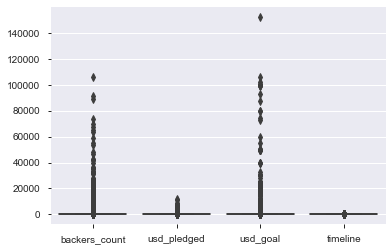

In [34]:
#Feature distribution
ax=sns.boxplot(data=df_merge[['backers_count','usd_pledged','usd_goal','timeline']])
#ax.set_yscale('log')

In [28]:
#stats
df_merge[['backers_count','usd_pledged','usd_goal','timeline']].describe()

,backers_count,usd_pledged,usd_goal,timeline
count,182634.000000,182634.000000,182634.000000,182634.000000
mean,134.904558,11.909222,44.344580,32.996556
std,887.837872,93.176624,1172.704627,11.973383
min,0.000000,0.000000,0.000010,1.000000
25%,3.000000,0.075000,1.500000,30.000000
50%,23.000000,1.272504,5.000000,30.000000
75%,81.000000,5.977831,14.000000,35.000000
max,105857.000000,12143.435670,152350.076000,92.000000


Note: 
1. Each numeric feature have different variance and are on differnt scales. For instance, timeline has smaller values compared to pledged and goal amounts

2. Scaled Pledged and Goal amoutns in USD are extremely high indicating special cases of unrealistically high amounts.
3. Minimum values of each of backers count, pledged and goal amounts is 0.
4. Minimum timeline is 1 day.


## 4.4 Removing Unusual cases

### Univariate Distributions

       backers_count       timeline    usd_pledged       usd_goal
count  182634.000000  182634.000000  182634.000000  182634.000000
mean      134.904558      32.996556      11.909222      44.344580
std       887.837872      11.973383      93.176624    1172.704627
min         0.000000       1.000000       0.000000       0.000010
25%         3.000000      30.000000       0.075000       1.500000
50%        23.000000      30.000000       1.272504       5.000000
75%        81.000000      35.000000       5.977831      14.000000
max    105857.000000      92.000000   12143.435670  152350.076000


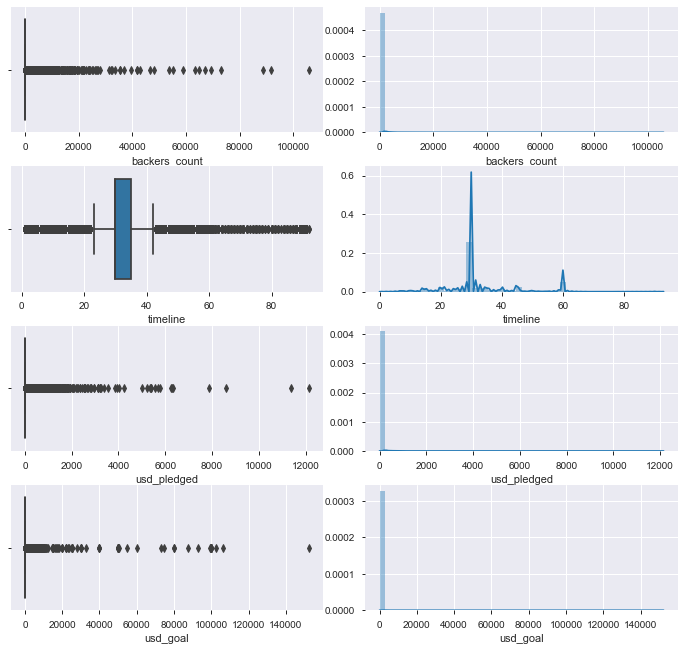

In [35]:
#subplot settings
fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(10,9))

fig.tight_layout()
#fig.subplots_adjust(hspace=1)

sns.boxplot(df_merge['backers_count'],ax=axes[0][0])
sns.distplot(df_merge['backers_count'], ax=axes[0][1])

sns.boxplot(df_merge['timeline'],ax=axes[1][0])
sns.distplot(df_merge['timeline'], ax=axes[1][1])

sns.boxplot(df_merge['usd_pledged'],ax=axes[2][0])
sns.distplot(df_merge['usd_pledged'], ax=axes[2][1])

sns.boxplot(df_merge['usd_goal'],ax=axes[3][0])
sns.distplot(df_merge['usd_goal'], ax=axes[3][1])

df_merge_summary = df_merge[['backers_count', 'timeline','usd_pledged','usd_goal']].describe()
print(df_merge_summary)

### Statistics : Data patterns in 9 years 

Averages :
1. Average goal amount set is 44000 USD
2. Average project timeline is 40 days
3. Average contributions made for a project is 135 in backers count.
4. Average pledged amount is 11000 USD

Minimum values : Unusually, the minimum goal amount is 10 cents, timeline is 1 day

Maximum values : Some extreme cases have very high goal amounts like 152,350,076 USD ; pledged amount as 12,143,435.670  USD and backers count 105857 contributions.

Note : Due to such unusual cases, the distirubtions of data are difficult to work with. 

### Comparison  : Successful and Failed Projects

In [14]:
#separate data
df_success = df_merge.query('state == "successful" ' )
df_fail = df_merge.query(' state == "failed" ')

Text(0, 0.5, 'Pledged $K )')

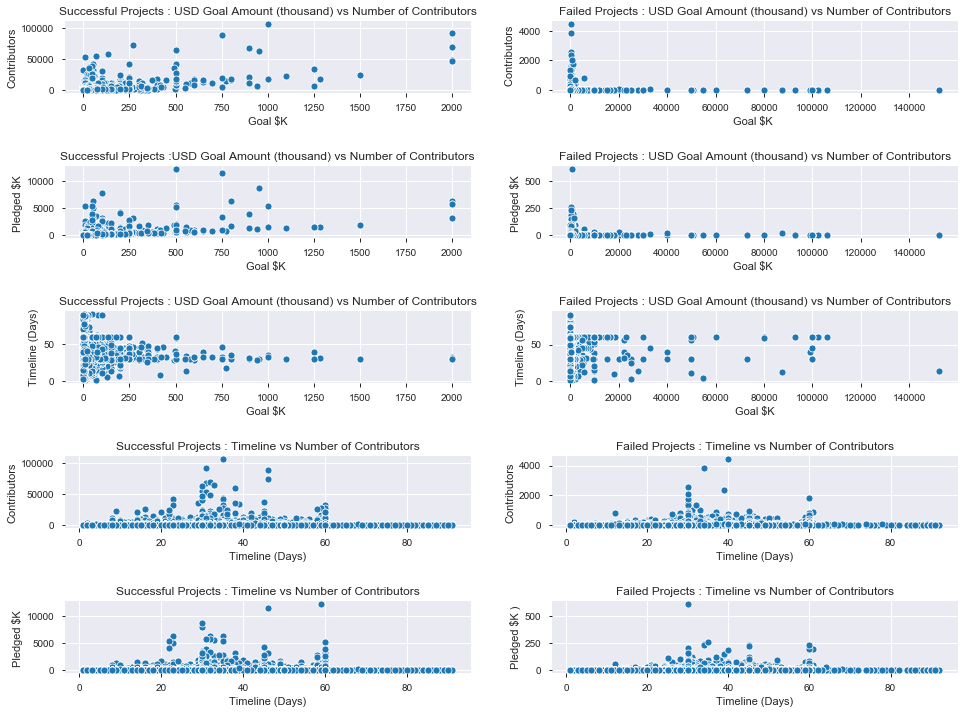

In [6]:
#Correlations and Subplots for Goal Amount and Number of Contributors for log transformed data 

#subplot settings
fig, axes = plt.subplots(nrows=5,ncols=2,figsize=(16,12))

#fig.tight_layout()
fig.subplots_adjust(hspace=1)

#control factors : Goal and Timeline

#Goal : Backers
#Goal : pledged
#Goal : Timeline (trend)
#Timeline : Backers
#Timeline : Pledged

#scatterplot

sns.scatterplot(x="usd_goal", y="backers_count", data= df_success, ax=axes[0][0])
axes[0][0].set_title('Successful Projects : USD Goal Amount (thousand) vs Number of Contributors')
axes[0][0].set_xlabel(' Goal $K ')
axes[0][0].set_ylabel('Contributors')

sns.scatterplot(x="usd_goal", y="backers_count", data= df_fail, ax=axes[0][1])
axes[0][1].set_title('Failed Projects : USD Goal Amount (thousand) vs Number of Contributors')
axes[0][1].set_xlabel('Goal $K ')
axes[0][1].set_ylabel(' Contributors')

sns.scatterplot(x="usd_goal", y="usd_pledged", data= df_success, ax=axes[1][0])
axes[1][0].set_title('Successful Projects :USD Goal Amount (thousand) vs Number of Contributors')
axes[1][0].set_xlabel('Goal $K ')
axes[1][0].set_ylabel('Pledged $K ')


sns.scatterplot(x="usd_goal", y="usd_pledged", data= df_fail, ax=axes[1][1])
axes[1][1].set_title('Failed Projects : USD Goal Amount (thousand) vs Number of Contributors')
axes[1][1].set_xlabel('Goal $K ')
axes[1][1].set_ylabel('Pledged $K ')


sns.scatterplot(x="usd_goal", y="timeline", data= df_success, ax=axes[2][0])
axes[2][0].set_title('Successful Projects : USD Goal Amount (thousand) vs Number of Contributors')
axes[2][0].set_xlabel('Goal $K ')
axes[2][0].set_ylabel('Timeline (Days)')

sns.scatterplot(x="usd_goal", y="timeline", data= df_fail, ax=axes[2][1])
axes[2][1].set_title('Failed Projects : USD Goal Amount (thousand) vs Number of Contributors')
axes[2][1].set_xlabel('Goal $K')
axes[2][1].set_ylabel('Timeline (Days)')

sns.scatterplot(x="timeline", y="backers_count", data= df_success, ax=axes[3][0])
axes[3][0].set_title('Successful Projects : Timeline vs Number of Contributors')
axes[3][0].set_xlabel('Timeline (Days)')
axes[3][0].set_ylabel('Contributors')

sns.scatterplot(x="timeline", y="backers_count", data= df_fail, ax=axes[3][1])
axes[3][1].set_title('Failed Projects : Timeline vs Number of Contributors')
axes[3][1].set_xlabel('Timeline (Days)')
axes[3][1].set_ylabel('Contributors')

sns.scatterplot(x="timeline", y="usd_pledged", data= df_success, ax=axes[4][0])
axes[4][0].set_title('Successful Projects : Timeline vs Number of Contributors')
axes[4][0].set_xlabel('Timeline (Days)')
axes[4][0].set_ylabel('Pledged $K ')

sns.scatterplot(x="timeline", y="usd_pledged", data= df_fail, ax=axes[4][1])
axes[4][1].set_title('Failed Projects : Timeline vs Number of Contributors')
axes[4][1].set_xlabel('Timeline (Days)')
axes[4][1].set_ylabel('Pledged $K )')


#print(corr_matrix)

In [15]:
#stats : Successful projects
df_success[['usd_goal','usd_pledged','timeline','backers_count']].describe()

,usd_goal,usd_pledged,timeline,backers_count
count,96767.000000,96767.000000,96767.000000,96767.000000
mean,9.151821,21.144978,31.096355,240.261370
std,27.424307,126.746738,10.752415,1205.772148
min,0.000010,0.001000,1.000000,1.000000
25%,1.000000,1.748766,29.000000,31.000000
50%,3.500000,4.830917,30.000000,68.000000
75%,9.726490,12.425500,32.000000,159.000000
max,2000.000000,12143.435670,91.000000,105857.000000


In [17]:
#stats : Failed projects
df_fail[['usd_goal','usd_pledged','timeline','backers_count']].describe()

,usd_goal,usd_pledged,timeline,backers_count
count,73194.000000,73194.000000,73194.000000,73194.000000
mean,83.094495,1.101870,34.873077,12.325423
std,1687.479741,5.732644,12.766007,46.732410
min,0.001000,0.000000,1.000000,0.000000
25%,2.500000,0.001016,30.000000,1.000000
50%,7.125624,0.056966,30.000000,3.000000
75%,22.754352,0.445000,40.000000,9.000000
max,152350.076000,607.628380,92.000000,4435.000000


In [20]:
#cap data
cond_cap = df_merge['usd_goal'] <= max(df_success['usd_goal'])
df_merge_org = df_merge
df_merge = df_merge[cond_cap]
print(df_merge.shape)
df_merge[['usd_goal','usd_pledged','timeline','backers_count']].describe()


(182353, 26)


,usd_goal,usd_pledged,timeline,backers_count
count,182353.000000,182353.000000,182353.000000,182353.000000
mean,20.221353,11.925981,32.978712,135.098764
std,81.995322,93.247195,11.957638,888.504410
min,0.000010,0.000000,1.000000,0.000000
25%,1.500000,0.075000,30.000000,3.000000
50%,5.000000,1.280000,30.000000,23.000000
75%,13.822808,5.997688,35.000000,81.000000
max,2000.000000,12143.435670,92.000000,105857.000000


#### Inference
1. Average Goal amount of Failed projets is higher than Succesful projects.
2. The maximum goal amount for successful projects is 2000,000 USD. 
3. We can cap the data at goal amount of 2000,000 USD

#### Removing all 1s

In [21]:
# Scaling Goal and Pledged amount back to USD
df_merge['usd_goal']= df_merge['usd_goal']*1000
df_merge['usd_pledged']= df_merge['usd_pledged']*1000


In [23]:
# Removing all data <= 1

#check for records where USD goal = 1 and remove

cond_goal = df_merge['usd_goal'] <= 1
cond_state = df_merge['state'] == 'successful'
print(df_merge[cond_goal & cond_state].shape)
p = round(  ((len(df_merge[cond_goal & cond_state])/len(df_merge))*100 ) , 2)
print("Proportion :  %s %%\n" % p)
#df_merge[cond_goal & cond_state][['state','category','country','launched_at','timeline','usd_goal','usd_pledged','backers_count']].head()


(217, 26)
Proportion :  0.12 %



In [24]:
#df_merge[cond_goal].groupby(['lauchedat_year','state'])['id'].count()

In [25]:
# remove goal <= 1 day
cond = df_merge['usd_goal'] > 1
df_merge = df_merge[cond]
print("Count after removing Goal <= 1")
print(df_merge.shape)

# remove timeline <= 1 day
cond_days = df_merge['timeline'] > 1
df_merge = df_merge[cond_days]
print("Count after removing Timeline <= 1")
print(df_merge.shape)

# remove backers <= 1
cond_backers = df_merge['backers_count']> 1
df_merge = df_merge[cond_backers]
print("Count after removing Backers <= 1")
print(df_merge.shape)

# remove pledged <= 1
cond_pledged = df_merge['usd_pledged'] > 1
df_merge=df_merge[cond_pledged]
print("Count after removing Pledged <= 1")
print(df_merge.shape)

Count after removing Goal <= 1
(182097, 26)
Count after removing Timeline <= 1
(182043, 26)
Count after removing Backers <= 1
(149996, 26)
Count after removing Pledged <= 1
(149995, 26)


## 4.4 Outliers Treatment

Removing outliers based on z-score to retain 95% of the data

#### 4.4.1 Outliers Treatment : Goal Amount in  (USD) 

In [26]:
#outliers USD_goal
outliers = df_merge[(np.abs(stats.zscore(df_merge['usd_goal'])) >= 3 )]
outliers.sort_values('usd_goal',inplace=True)
print("Total Outlier observations :")
print(outliers.shape)
p_out_usd = round(  ((len(outliers)/len(df_merge))*100 ) , 2)
print("Proportion of Outliers : %s %%\n" % p_out_usd)
#print(outliers[['usd_goal','timeline','backers_count','usd_pledged']].describe())
#print(outliers[['id','launched_at','category','sub_category','country','usd_goal','timeline','backers_count','usd_pledged','state','web_url']].head())

#remove the outliers
outliers_sub = df_merge[(np.abs(stats.zscore(df_merge['usd_goal'])) >=3 )]
df_merge = df_merge[ ~df_merge.index.isin(outliers_sub.index) ]
print("Observations after removing outliers (USD Goal) : ")
print(df_merge.shape)


Total Outlier observations :
(1406, 26)
Proportion of Outliers : 0.94 %

           usd_goal     timeline  backers_count   usd_pledged
count  1.406000e+03  1406.000000    1406.000000  1.406000e+03
mean   5.336729e+05    40.463727    1383.034851  1.409554e+05
std    3.956115e+05    13.320299    7091.800882  7.113243e+05
min    2.180812e+05     4.000000       2.000000  1.705134e+00
25%    2.560410e+05    30.000000       3.000000  6.100000e+01
50%    3.709815e+05    34.000000       6.000000  4.570000e+02
75%    6.000000e+05    59.000000      37.000000  7.528015e+03
max    2.000000e+06    61.000000  105857.000000  1.214344e+07
Observations after removing outliers (USD Goal) : 
(148589, 26)


In [27]:
#outliers[['id','launched_at','category','sub_category','country','usd_goal','timeline','backers_count','usd_pledged','state','web_url']].tail()

#### 4.4.2 Outliers Treatment : Pledged Amount  (USD) 

In [28]:
#outliers Pledged
outliers = df_merge[(np.abs(stats.zscore(df_merge['usd_pledged'])) >= 3 )]
outliers.sort_values('usd_pledged',inplace=True)
print("Total Outlier observations :")
print(outliers.shape)
p_out_usd = round(  ((len(outliers)/len(df_merge))*100 ) , 2)
print("Proportion of Outliers : %s %%\n" % p_out_usd)
#print(outliers[['usd_goal','timeline','backers_count','usd_pledged']].describe())

#remove the outliers
outliers_sub = df_merge[(np.abs(stats.zscore(df_merge['usd_pledged'])) >=3 )]
df_merge = df_merge[ ~df_merge.index.isin(outliers_sub.index) ]
print("Observations after removing outliers (USD Pledged) : ")
print(df_merge.shape)

#outliers[['id','launched_at','category','sub_category','country','usd_goal','timeline','backers_count','usd_pledged','state','web_url']].head()

Total Outlier observations :
(1022, 26)
Proportion of Outliers : 0.69 %

Observations after removing outliers (USD Pledged) : 
(147567, 26)


#### 4.4.3 Outliers Treatment : Backers Count 

In [29]:
#outliers backers count
outliers = df_merge[(np.abs(stats.zscore(df_merge['backers_count'])) >= 3 )]
outliers.sort_values('backers_count',inplace=True)
print("Total Outlier observations :")
print(outliers.shape)
p_out_usd = round(  ((len(outliers)/len(df_merge))*100 ) , 2)
print("Proportion of Outliers : %s %%\n" % p_out_usd)
#print(outliers[['usd_goal','timeline','backers_count','usd_pledged']].describe())

#remove the outliers
outliers_sub = df_merge[(np.abs(stats.zscore(df_merge['backers_count'])) >=3 )]
df_merge = df_merge[ ~df_merge.index.isin(outliers_sub.index) ]
print("Observations after removing outliers (backers_count) : ")
print(df_merge.shape)

#outliers[['id','launched_at','category','sub_category','country','usd_goal','timeline','backers_count','usd_pledged','state','web_url']].head()

Total Outlier observations :
(2552, 26)
Proportion of Outliers : 1.73 %

Observations after removing outliers (backers_count) : 
(145015, 26)


#### 4.4.4 Outliers Treatment : Timeline

In [30]:
#outliers timeline
outliers = df_merge[(np.abs(stats.zscore(df_merge['timeline'])) >= 3 )]
outliers.sort_values('timeline',inplace=True)
print("Total Outlier observations :")
print(outliers.shape)
p_out_usd = round(  ((len(outliers)/len(df_merge))*100 ) , 2)
print("Proportion of Outliers : %s %%\n" % p_out_usd)
#print(outliers[['usd_goal','timeline','backers_count','usd_pledged']].describe())

#remove the outliers
outliers_sub = df_merge[(np.abs(stats.zscore(df_merge['timeline'])) >=3 )]
df_merge = df_merge[ ~df_merge.index.isin(outliers_sub.index) ]
print("Observations after removing outliers (timeline) : ")
print(df_merge.shape)

#outliers[['id','launched_at','category','sub_category','country','usd_goal','timeline','backers_count','usd_pledged','state','web_url']].head()

Total Outlier observations :
(365, 26)
Proportion of Outliers : 0.25 %

Observations after removing outliers (timeline) : 
(144650, 26)


## 4.5 Log Transformation of Numeric Features

Log transformations additionally scale the data on the log scale.

       log_backers_count   log_timeline  log_usd_pledged   log_usd_goal
count      144650.000000  144650.000000    144650.000000  144650.000000
mean            3.445507       3.413976         7.362318       8.280129
std             1.539254       0.377552         2.148902       1.578933
min             0.693147       0.693147         0.019203       0.048019
25%             2.302585       3.401197         6.111467       7.313220
50%             3.583519       3.401197         7.705262       8.411833
75%             4.564348       3.526361         8.881530       9.305651
max             6.986566       4.204693        12.386743      12.290715


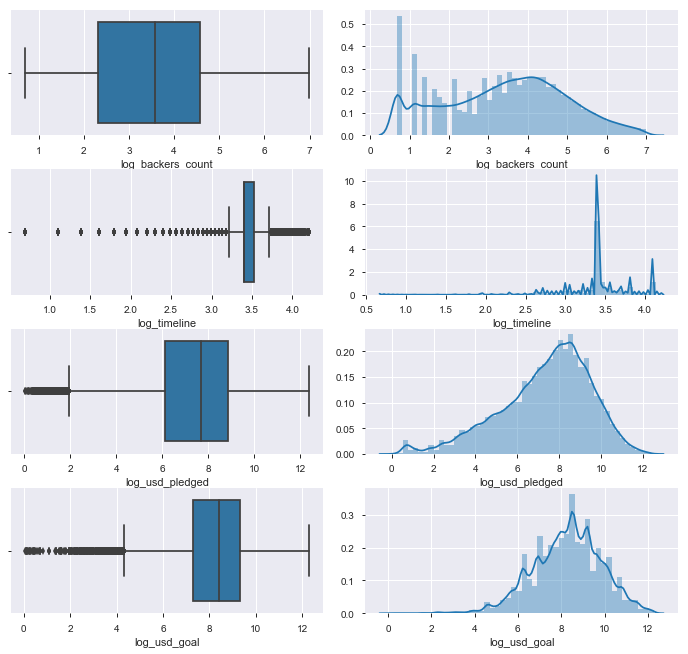

In [90]:
#normalizing data using logs
to_log = ['backers_count', 'timeline','usd_pledged','usd_goal']
df_log = df_merge[to_log].applymap(lambda x: np.log(x))
#df_log.insert(0,"state",df_merge['state'])

df_log.columns = 'log_' + df_log.columns

#subplot settings
fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(10,9))

fig.tight_layout()
#fig.subplots_adjust(hspace=1)

sns.boxplot(df_log['log_backers_count'],ax=axes[0][0])
sns.distplot(df_log['log_backers_count'], ax=axes[0][1])

sns.boxplot(df_log['log_timeline'],ax=axes[1][0])
sns.distplot(df_log['log_timeline'], ax=axes[1][1])

sns.boxplot(df_log['log_usd_pledged'],ax=axes[2][0])
sns.distplot(df_log['log_usd_pledged'], ax=axes[2][1])

sns.boxplot(df_log['log_usd_goal'],ax=axes[3][0])
sns.distplot(df_log['log_usd_goal'], ax=axes[3][1])

df_log_summary = df_log[['log_backers_count', 'log_timeline','log_usd_pledged','log_usd_goal']].describe()
print(df_log_summary)

In [42]:
#boxplots - revisited
#sns.boxplot(data=df_log[['log_backers_count','log_usd_pledged','log_usd_goal','log_timeline']])

### Remove outliers based on IQR on orginial data

In [43]:
#df_merge[['backers_count', 'timeline','usd_pledged','usd_goal']].describe()

In [47]:
# remove outliers based on IQR of Goal amount
#df_q =df_merge[['backers_count', 'timeline','usd_pledged','usd_goal']]

#Q1 = df_q.quantile(0.25)
#Q3 = df_q.quantile(0.75)
#IQR = Q3 - Q1

#df_IQR_ = df_q[~((df_q < (Q1 - 1.5 * IQR)) |(df_q > (Q3 + 1.5 * IQR))).any(axis=1)]
#df_IQR_.head()

In [38]:
#subsetting data based on IQR
df_IQR = df_merge[ df_merge.index.isin(df_IQR_.index) ]
df_IQR.shape

(77484, 26)

In [50]:
#IQR Describe
#df_IQR_.describe()

In [51]:
#max goal
#cond_max = df_merge['usd_goal']== max(df_merge['usd_goal'])
#df_merge[['state','category','sub_category','country','launched_at','usd_goal', 'timeline','usd_pledged','backers_count']][cond_max]

In [53]:
#max pledged
#cond_max = df_merge['usd_pledged']== max(df_merge['usd_pledged'])
#df_merge[['state','category','sub_category','country','launched_at','usd_goal', 'timeline','usd_pledged','backers_count']][cond_max]

#### Note : 
#For max Pledged amount, Goal amount is 88K USD which is very high. These are spcial cases where the factors involved depend on the popularity of Project host or the nature of the project for which they are raising funds.

In [54]:
#max backers
#cond_max = df_merge['backers_count']== max(df_merge['backers_count'])
#df_merge[['state','category','sub_category','country','launched_at','usd_goal', 'timeline','usd_pledged','backers_count']][cond_max]

In [55]:
#max timeline
#cond_max = df_merge['timeline']== max(df_merge['timeline'])
#df_merge[['state','category','country','sub_category','launched_at','usd_goal', 'timeline','usd_pledged','backers_count']][cond_max]

### Ascending and Descending order of Goal and Timeline

In [45]:
#sorted data
features = ['state','category','sub_category','country','launched_at','usd_goal', 'timeline','usd_pledged','backers_count']
df_sort = df_merge[features]
#df_sort[['usd_goal', 'timeline','usd_pledged','backers_count']].describe()

In [56]:
#Decreasing order of Goal amount : High to Low
df_sort.sort_values('usd_goal', ascending=False).head()

,state,category,sub_category,country,launched_at,usd_goal,timeline,usd_pledged,backers_count
179886,failed,technology,apps,GB,2018-04-03,217665.44755,60,198.005343,6
173319,failed,technology,wearables,DE,2017-04-26,217189.93200,45,3186.176302,13
28835,failed,technology,web,GB,2016-03-21,217124.77650,28,10.132490,3
21906,failed,technology,sound,US,2014-11-21,217000.00000,60,85615.000000,410
72269,failed,film & video,romance,GB,2016-02-25,216730.17135,45,1040.304822,11


In [57]:
#Increasing order of Goal amount : High to Low
df_sort.sort_values('usd_goal', ascending=True).head()

,state,category,sub_category,country,launched_at,usd_goal,timeline,usd_pledged,backers_count
86364,successful,film & video,shorts,MX,2019-03-20,1.049191,40,1053.324612,13
203115,successful,music,rock,IT,2015-11-10,1.076644,30,889.308060,15
184035,successful,music,pop,ES,2016-11-04,1.111852,40,227.929732,8
21174,successful,technology,hardware,FR,2016-08-29,1.119884,60,2.239767,2
106203,successful,photography,people,BE,2016-10-05,1.120134,60,16.802016,5


#### Note :
Goal amounts are very low less that 2 USD, which have high pledged amounts. However in these scenarios the aunthenticity of the cause is questionable. Such unusual cases are excluded in this analysis due to the limitated avaiable data for analysis. 

In [46]:
#Decreasing order of Timeline in days : High to Low
df_sort.sort_values('timeline', ascending=False).head()

,state,category,sub_category,country,launched_at,usd_goal,timeline,usd_pledged,backers_count
44213,successful,film & video,narrative film,US,2010-06-18,5000.0,67,5035.0,38
190136,successful,art,sculpture,US,2009-12-24,7000.0,67,7325.0,43
177778,successful,music,classical music,US,2011-05-10,3500.0,67,3625.0,39
91083,successful,film & video,narrative film,US,2010-05-15,13000.0,67,13165.0,107
200727,successful,film & video,webseries,US,2009-11-26,2500.0,67,3818.0,50


In [58]:
#Increasing order of Timeline in days : High to Low
df_sort.sort_values('timeline', ascending=True).head()

,state,category,sub_category,country,launched_at,usd_goal,timeline,usd_pledged,backers_count
82817,successful,publishing,radio & podcasts,US,2013-06-28,300.000000,2,300.00000,7
125514,failed,design,interactive design,US,2019-06-05,5050.000000,2,4638.09000,228
113528,successful,art,public art,US,2011-10-21,10.000000,2,147.50000,2
193499,successful,photography,photobooks,DE,2018-08-16,11.322746,2,14.71957,3
75142,successful,food,restaurants,US,2019-05-28,2000.000000,2,2561.00000,55


#### Inference
 Our analysis of extremely high and low values of individual features, show that the outlier cases are unusual and for the purpose of building classification and regression models with limited data, we can retain 50% of the data falling in the IQR. 


### Removing outliers based on IQR after log transformation

In [86]:
# remove outliers based on IQR of Goal amount
df_q =df_log[['log_backers_count', 'log_timeline','log_usd_pledged','log_usd_goal']]

Q1 = df_q.quantile(0.25)
Q3 = df_q.quantile(0.75)
IQR = Q3 - Q1

df_log_IQR_ = df_q[~((df_log < (Q1 - 1.5 * IQR)) |(df_log > (Q3 + 1.5 * IQR))).any(axis=1)]
#df_log_IQR_.head()
df_log_IQR_[['log_backers_count', 'log_timeline','log_usd_pledged','log_usd_goal']].describe()

,log_backers_count,log_timeline,log_usd_pledged,log_usd_goal
count,96383.000000,96383.000000,96383.000000,96383.000000
mean,3.623959,3.425630,7.660869,8.431047
std,1.511189,0.089446,1.958031,1.438744
min,0.693147,3.218876,1.959866,4.325070
25%,2.564949,3.401197,6.461468,7.530330
50%,3.761200,3.401197,7.965123,8.517193
75%,4.709530,3.433987,9.059940,9.392662
max,6.986566,3.713572,12.386743,12.288227


In [92]:
df_IQR = df_log[ df_log.index.isin(df_log_IQR_.index)]
print(df_IQR.shape)
#df_IQR.head()
df_IQR.insert(0,'state',df_merge['state'][ df_merge.index.isin(df_log_IQR_.index)])
df_IQR.insert(5,'category',df_merge['category'][ df_merge.index.isin(df_log_IQR_.index)])
df_IQR.insert(6,'sub_category',df_merge['sub_category'][ df_merge.index.isin(df_log_IQR_.index)])
df_IQR.insert(7,'country',df_merge['country'][ df_merge.index.isin(df_log_IQR_.index)])
#df_IQR.drop('log_state', axis=1)
df_IQR.head()

(96383, 4)


,state,log_backers_count,log_timeline,log_usd_pledged,log_usd_goal,category,sub_category,country
164816,successful,2.397895,3.367296,5.553099,5.410443,art,performance art,GB
129747,failed,2.890372,3.401197,6.654153,9.903488,food,spaces,US
99666,successful,3.951244,3.401197,8.001355,7.130899,design,graphic design,US
142475,successful,6.224558,3.401197,11.100994,10.126631,film & video,television,US
214,successful,3.218876,3.401197,7.090910,7.090077,music,electronic music,US


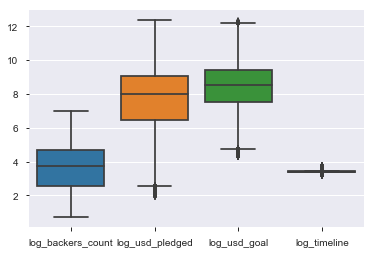

In [93]:
sns.boxplot(data=df_log_IQR_[['log_backers_count','log_usd_pledged','log_usd_goal','log_timeline']])

## 4.6. Bivariate Analysis  : Feature Relationship post Log transformation

In [94]:
#separating failed and successful projects
#seperate Successful and Failed Projects
df_success = df_IQR.query('state == "successful" ' )
df_fail = df_IQR.query(' state == "failed" ')
print(df_success.shape)
print(df_fail.shape)

(63311, 8)
(28610, 8)


### 4.6.1 Scatter plot : Correlation

In [95]:
df_data = pd.concat([df_success,df_fail])
print(df_data.shape)
#df_data.head()

(91921, 8)


### 1. Correlations and Subplots for Pledge Amount and Goal Amount - log transformed

                 log_usd_pledged  log_usd_goal
log_usd_pledged         1.000000      0.384692
log_usd_goal            0.384692      1.000000


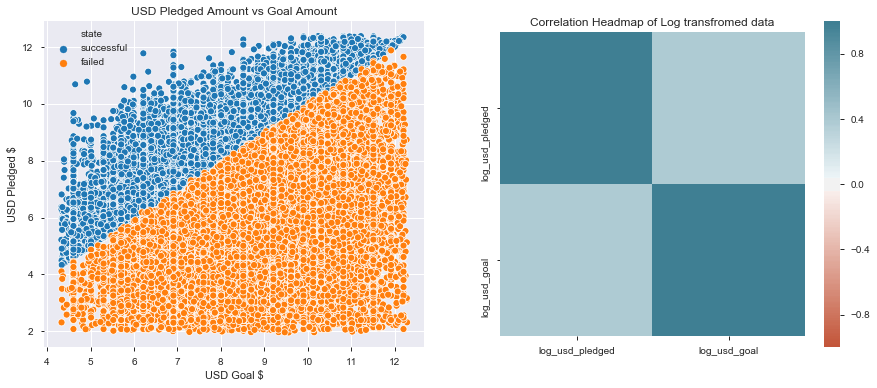

In [98]:
#Correlations and Subplots for Pledge Amount and Goal Amount - log transfomred

#subplot settings
fig, axes = plt.subplots(ncols=2,figsize=(15,6))

#fig.tight_layout()
fig.subplots_adjust(hspace=2)

#correlation matrix 

#df1=df_merge[["usd_pledged","usd_goal"]]
df1=df_data[["log_usd_pledged","log_usd_goal"]]
corr_matrix = df1.corr()


#scatterplot

sns.scatterplot(y="log_usd_pledged", x="log_usd_goal",hue="state", data= df_data, ax=axes[0])
axes[0].set_title('USD Pledged Amount vs Goal Amount')
axes[0].set_xlabel('USD Goal $')
axes[0].set_ylabel('USD Pledged $')

#correlleogram

sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, ax=axes[1])
axes[1].set_title('Correlation Headmap of Log transfromed data')

print(corr_matrix)

### 2. Correlations and Subplots for Pledged Amount and Timeline - log transformed

                 log_usd_pledged  log_timeline
log_usd_pledged          1.00000       0.07102
log_timeline             0.07102       1.00000


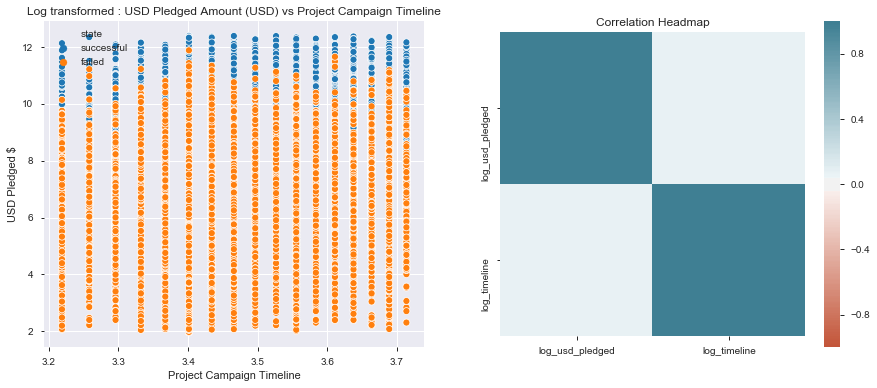

In [99]:
#Correlations and Subplots for Pledge Amount and Timeline - log transformed

#subplot settings
fig, axes = plt.subplots(ncols=2,figsize=(15,6))

#fig.tight_layout()
fig.subplots_adjust(hspace=2)

#correlation matrix 
df2=df_data[["log_usd_pledged","log_timeline"]]
corr_matrix = df2.corr()

#scatterplot

sns.scatterplot(x="log_timeline", y="log_usd_pledged",hue="state", data= df_data, ax=axes[0])
axes[0].set_title('Log transformed : USD Pledged Amount (USD) vs Project Campaign Timeline')
axes[0].set_xlabel('Project Campaign Timeline')
axes[0].set_ylabel('USD Pledged $')

#correlleogram

sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, ax=axes[1])
axes[1].set_title('Correlation Headmap')

print(corr_matrix)

### 3. Correlations and Subplots for Backers and Timeline - log transformed

                   log_backers_count  log_timeline
log_backers_count           1.000000      0.052642
log_timeline                0.052642      1.000000


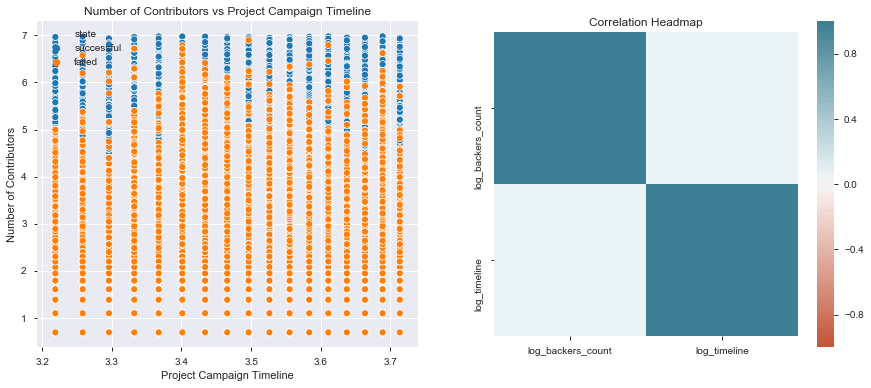

In [101]:
#Correlations and Subplots for Number of Contributors and Timeline - log transformed

#subplot settings
fig, axes = plt.subplots(ncols=2,figsize=(15,6))

#fig.tight_layout()
fig.subplots_adjust(hspace=2)

#correlation matrix 
df3=df_data[["log_backers_count","log_timeline"]] 
corr_matrix = df3.corr()

#scatterplot

sns.scatterplot(x="log_timeline", y="log_backers_count",hue="state", data= df_data, ax=axes[0])
axes[0].set_title('Number of Contributors vs Project Campaign Timeline')
axes[0].set_xlabel('Project Campaign Timeline')
axes[0].set_ylabel('Number of Contributors')

#correlleogram

sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, ax=axes[1])
axes[1].set_title('Correlation Headmap')

print(corr_matrix)

### 4. Correlations and Subplots for Backers and Goal amount - log transformed

                   log_backers_count  log_usd_goal
log_backers_count           1.000000      0.256184
log_usd_goal                0.256184      1.000000


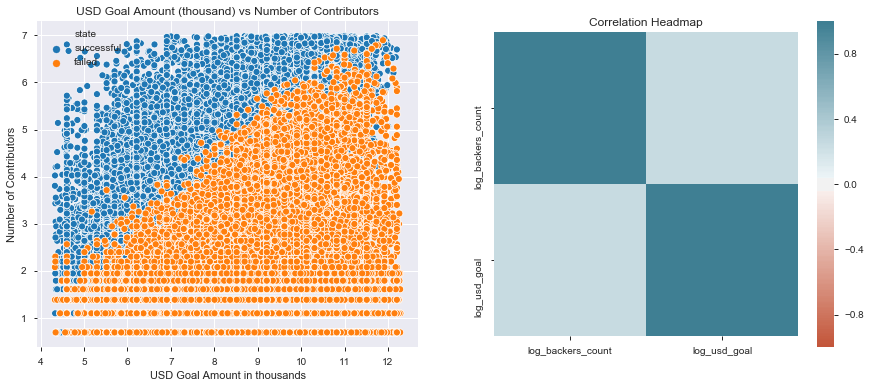

In [102]:
#Correlations and Subplots for Goal Amount and Number of Contributors - log transformed

#subplot settings
fig, axes = plt.subplots(ncols=2,figsize=(15,6))

#fig.tight_layout()
fig.subplots_adjust(hspace=2)

#correlation matrix 
df4=df_data[["log_backers_count","log_usd_goal"]] 
corr_matrix = df4.corr()

#scatterplot

sns.scatterplot(x="log_usd_goal", y="log_backers_count",hue="state", data= df_data, ax=axes[0])
axes[0].set_title('USD Goal Amount (thousand) vs Number of Contributors')
axes[0].set_xlabel('USD Goal Amount in thousands')
axes[0].set_ylabel('Number of Contributors')

#correlleogram

sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, ax=axes[1])
axes[1].set_title('Correlation Headmap')

print(corr_matrix)

## 5. T-test for Successful and Failed Projects

At this point , the volume of projects sucessful and failure is similar at 52% and 40% respectively . With hypothesis testing we want to understand if the features of the success and failure states are statistically different. 

In this test we are testing our hypothesis that Successful Projects have different Goal amounts, Pledged amounts, backers counts and timelines as compared to the Failed Projects. 

In [103]:
#test

ttest, pval = ttest_ind(df_success['log_usd_goal'], df_fail['log_usd_goal'])
print("Ttest for goal amounts of Successful and Failed Projects")
print("p-value : ",pval)
print("ttest : ",ttest)


ttest, pval = ttest_ind(df_success['log_usd_pledged'], df_fail['log_usd_pledged'])
print("\nTtest for pledged amounts of Successful and Failed Projects")
print("p-value : ",pval)
print("ttest : ",ttest)


ttest, pval = ttest_ind(df_success['log_backers_count'], df_fail['log_backers_count'])
print("\nTtest for Backers count of Successful and Failed Projects")
print("p-value : ",pval)
print("ttest : ",ttest)

ttest, pval = ttest_ind(df_success['log_timeline'], df_fail['log_timeline'])
print("\nTtest for timeline of Successful and Failed Projects")
print("p-value : ",pval)
print("ttest : ",ttest)

Ttest for goal amounts of Successful and Failed Projects
p-value :  0.0
ttest :  -74.82772696445916

Ttest for pledged amounts of Successful and Failed Projects
p-value :  0.0
ttest :  248.5052312178968

Ttest for Backers count of Successful and Failed Projects
p-value :  0.0
ttest :  265.82809584522727

Ttest for timeline of Successful and Failed Projects
p-value :  0.00024101824972924479
ttest :  -3.6717642019561665


### Inference :

The above t-tests show that Successful and Failed projects are statistically different. 

1. The p-values of each t-statistic is less that the level of significance of 5%.  
2. The t-statistic is far from 0 for each of the tests indicating the means are different for each data slice. 

## 6. Machine Learning Techniques

### 6.1 Logistic Regression 

As per the scatter plots we can see the data doesnot have any linear pattern. Therefore we shall perform Logistic Regression as an intial step for determining the relationship between features and the project status outcome.

Training Accuracy : 70.97%
Actuals     failed  successful
Predicted                     
failed         622         286
successful    5078       12399
Testing Accuracy:  0.7082404133804732


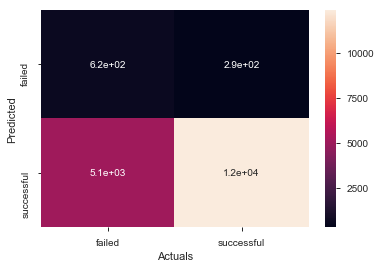

In [104]:
# Logistic regression with cross validation
from sklearn import model_selection

train, test = train_test_split(df_data, test_size=0.2, random_state=0)

kfold = model_selection.KFold(n_splits = 10, random_state=0, shuffle=True)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, train[['log_usd_goal','log_timeline']], train['state'], cv=kfold)
print("Training Accuracy : %.2f%%" % (results_kfold.mean()*100.0))
#print(results_kfold)
#print(results_kfold.cv)

results_kfold_pred = model_selection.cross_val_predict(model_kfold, test[['log_usd_goal','log_timeline']], test['state'], cv=kfold)
#print("Accuracy : %.2f%%" % (results_kfold_pred.mean()*100.0))
#print(results_kfold_pred)
confusion_matrix_cv = pd.crosstab( results_kfold_pred, test['state'], rownames=['Predicted'], colnames=['Actuals'])
print(confusion_matrix_cv)
print('Testing Accuracy: ',metrics.accuracy_score(test['state'], results_kfold_pred))
#print("Misclassification on Test data : ", metrics.classification_report )

sns.heatmap(confusion_matrix_cv, annot=True)

#### Inference & Summary of Logistic Regression

As per the results of logistic regression, accuracy of prediction of successful projects is 85.8% which is good.

However the misclassification of failed projects is 60% which is high. 

Logistic regression based on the goal and timeline set by the project owners is not a model with high predictive power. We will need to make some transformations and apply more effective machine learning techniques to improve the accuracy of prediction and reduce the misclassification rate. 

### 6.2 Linear Regression

Predicting Backers Count based on Goal and Timeline

In [110]:
# linear regression to predict backers count

train, test = train_test_split(df_data, test_size=0.2, random_state=0)

backers_model = sm.OLS(train['log_usd_pledged'],train[['log_usd_goal','log_timeline']]).fit()
#backers_model = sm.OLS(df_data['backers_count'],X_poly).fit()

print(backers_model.params)

print(backers_model.summary())
#backers_lm.

pred_backers = backers_model.predict(test[['log_usd_goal','log_timeline']])

# RMSE
print(np.sqrt(metrics.mean_squared_error(test['log_usd_pledged'], pred_backers)))

#accuracy
#print(r2_score(test['log_backers_count'],pred_backers))


log_usd_goal    0.517360
log_timeline    0.980418
dtype: float64
                            OLS Regression Results                            
Dep. Variable:        log_usd_pledged   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 6.866e+05
Date:                Sun, 01 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:59:12   Log-Likelihood:            -1.4727e+05
No. Observations:               73536   AIC:                         2.945e+05
Df Residuals:                   73534   BIC:                         2.946e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [112]:
metrics.r2_score(test['log_usd_pledged'],pred_backers)

0.1530912659109861

We cannot use Linear regression to predict backers count because the relationship between usd_goal and backers count is not linear

### 6.3 Decision Tree

In [113]:
#Building Tree
from sklearn.tree import DecisionTreeClassifier

train, test = train_test_split(df_data, test_size=0.2, random_state=0)

X= train[['log_usd_goal','log_timeline']]
y= train['state']

dtreeclass = DecisionTreeClassifier()

dtreeclass = dtreeclass.fit(X, y)

X_test = test[['log_usd_goal','log_timeline']]
y_test = test['state']

y_pred = dtreeclass.predict(X_test)

print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.6746260538482458


In [115]:
#import IPython
#from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
#from IPython.display import Image
#import pydotplus

#dot_data = StringIO()
#export_graphviz(dtreeclass, out_file = dot_data, filled=True, rounded=True, special_characters=True, feature_names=['log_usd_goal','log_timeline'], class_names=['Successful','Failed'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('tree.png')
#Image(graph.create_png())

In [98]:
#Decision Tree for predicting backers count



train, test = train_test_split(df_data, test_size=0.2, random_state=0)
#kfold = model_selection.KFold(n_splits = 10, random_state=0, shuffle=True)

X= train[['usd_goal','timeline']]
y= train['backers_count']

reg_tree = DecisionTreeRegressor(random_state=0)
reg_tree.fit(X,y)

#score= np.mean(cross_val_score(reg_tree,test[['usd_goal','timeline']],test['backers_count'],scoring='mean_squared_error',cv=kfold, n_jobs=1 ))

score= cross_val_score(reg_tree,test[['usd_goal','timeline']],test['backers_count'],cv=kfold, n_jobs=1, scoring )

print(score)


[-0.71825158 -0.25028208 -0.28663439 -0.29637577 -0.22506494 -0.27901183
 -0.38350412 -0.37988113 -0.23589405 -0.42628727]


### 6.4 KNearest Neighbors Model

In [116]:
# setting X and Y
feature =["state"]
y = df_data[feature]
feature =['log_usd_goal','log_timeline']
X = df_data[feature]

#spliting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# KNN for 10 neighhbours
classifier = KNeighborsClassifier(n_neighbors=25)
classifier.fit(X_train, y_train)

# predict for test data
y_pred = classifier.predict(X_test)

# accuracy of prediction
print(metrics.accuracy_score(y_test, y_pred))

#Classification matrix
print(confusion_matrix( y_pred,y_test, labels=['successful','failed'] ))
#confusion_matrix_knn = pd.crosstab( y_pred, y_test, rownames=['Predicted'], colnames=['Actuals'])
#print(confusion_matrix_knn)
print(classification_report( y_pred,y_test))




0.7115039434321457
[[12034  4631]
 [  673  1047]]
              precision    recall  f1-score   support

      failed       0.18      0.61      0.28      1720
  successful       0.95      0.72      0.82     16665

   micro avg       0.71      0.71      0.71     18385
   macro avg       0.57      0.67      0.55     18385
weighted avg       0.88      0.71      0.77     18385



Text(0, 0.5, 'Testing Accuracy')

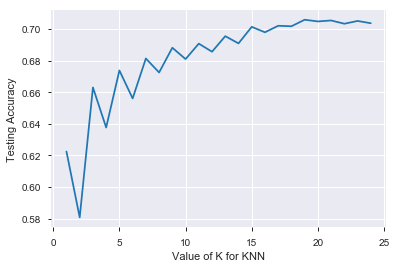

In [136]:
#optimal k

# try K=1 through K=25 and record testing accuracy
k_range = range(1, 25)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

#print(scores)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### Prediction based on recent data >2015 

In [119]:
#filter records
df_data.insert(1,'lauchedat_year',df_merge['lauchedat_year'][df_merge.index.isin(df_data.index)])
df_data.head()

# Extracting records from 2015 for prediciont
cond_past = df_data['lauchedat_year'] < 2015
df_history = df_data[cond_past]
print("Past data Year <= 2014")
print(df_history.shape)
df_recent = df_data[~cond_past]
print("Recent data Year > 2014")
print(df_recent.shape)

,state,lauchedat_year,log_backers_count,log_timeline,log_usd_pledged,log_usd_goal,category,sub_category,country
164816,successful,2015,2.397895,3.367296,5.553099,5.410443,art,performance art,GB
99666,successful,2018,3.951244,3.401197,8.001355,7.130899,design,graphic design,US
142475,successful,2013,6.224558,3.401197,11.100994,10.126631,film & video,television,US
214,successful,2012,3.218876,3.401197,7.090910,7.090077,music,electronic music,US
200366,successful,2013,3.637586,3.401197,8.080237,8.070906,film & video,narrative film,US


### 6.5 Random Forest

In [124]:
# Creating dummy variables
dummy_category=pd.get_dummies(df_recent['category'])
dummy_category.head()

#creating a dataset for Random Forest
df_forest=df_recent[['log_usd_goal','log_timeline','state']]
df_forest=pd.concat([df_forest, dummy_category.reindex(df_forest.index)], axis=1)
#print(df_forest.shape)
#df_forest.head()

df_forest_nostate=df_forest[['log_usd_goal','log_timeline']]
df_forest_nostate=pd.concat([df_forest_nostate, dummy_category.reindex(df_forest_nostate.index)], axis=1)
print(df_forest_nostate.shape)
df_forest_nostate.head()

,art,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater
164816,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99666,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
203975,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
113833,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
159432,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [127]:
#Model Evaluation

X = df_forest_nostate
y = df_forest['state']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 100)

#Fit the model
rf=RandomForestClassifier(n_estimators=1000,max_depth=None,max_features='auto')

#Model Evaluation
rf.fit(X_train, y_train)
yhat=rf.predict(X_test)
accuracy_score(y_test,yhat)

0.6679911362420723

### 6.6 Gradient Boosting

In [133]:
#model Building
from numpy import loadtxt
from xgboost import XGBClassifier

y = df_forest['state']
X = df_forest_nostate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier(n_estimators=1000)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [134]:
# Model evaluation
y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]
# evaluate predictions
#accuracy = accuracy_score(y_test, predictions)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7170474516695958


## 7. Conclusion : 

### Recomendations for Audience
1. Project Goal Amount below 2,000,000 USD is highly recommended.
2. Practically, lower goal amounts are more successfull compared to extremely higher amounts
3. Projects could be launched from Asian countries like Hong Kong, Singapore, European countries like Great Britain and United States have more visibility. 
4. An average timeline of 30 days would help raise more funds.
5. Projects launched at the beginning of the year are more likely to be successful.
6. Projects from creative categories like Dance, Comics , Music are more likely to succeed.

### Challenges of Analysis
1. The kickstarter data over the past 9 years is highly skewed due to the presence of outliers.
2. Unusual data such has projects trying to raise funds for 1 USD fetching 1000 times higher pledged amounts leads to questions on the authenticity of the objective of the project.
3. Projects with higher goal amounts achiveing  overwhelming funds can be attributed to the influence of social media popularity.

### Model Evaluation
1. The features of the data being analyized is non linear and in the form of clusters.
2. Due to the absence of linear relationship, regresssion using simple algorithms is a challenge.
3. There is a lot of overlap between succesful and failed proejcts data.
4. Classification using numeric parameters is not the strongest with an accuracy of 70% by KNN. 
5. Predicting using recent data reduces the accuracy due to the votatile nature of the trends of projects on kicstarter.


#### References


1. Group and count : https://stackoverflow.com/questions/47320572/pandas-groupby-and-count
2. Group and count in dataframe : https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-output-from-series-to-dataframe
3. Pivot table : https://stackoverflow.com/questions/34642180/convert-categorical-data-into-various-columns-for-plotting-in-pandas
4. Drop multilevel index : https://stackoverflow.com/questions/43756052/transform-pandas-pivot-table-to-regular-dataframe
5. Fill na with 0 : https://stackoverflow.com/questions/13295735/how-can-i-replace-all-the-nan-values-with-zeros-in-a-column-of-a-pandas-datafra
6. Stacked plot : https://stackoverflow.com/questions/56251848/how-do-i-make-pandas-catagorical-stacked-bar-chart-scale-to-100
7. Hypothesis Testing : https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
8. Split data into test and train : https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
9. Logistic Regression : https://datatofish.com/logistic-regression-python/
10. Yearly Time series : https://stackoverflow.com/questions/50997339/convert-daily-data-in-pandas-dataframe-to-monthly-data
11. Time Series https://stackoverflow.com/questions/33191857/how-can-i-convert-from-pandas-dataframe-to-timeseries
12. Time Series https://stackoverflow.com/questions/23859840/python-aggregate-by-month-and-calculate-average
13. Resampling https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html